In [1]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [3]:
df_accepted=pd.read_csv('cs_accepted.csv')

In [4]:
df_accepted.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2,0


In [5]:
df_rejected=pd.read_csv('cs_rejected.csv')

In [6]:
df_rejected.shape

(9626, 18)

In [7]:
df_accepted.shape

(9626, 19)

In [8]:
df_rejected.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5994722,F,N,Y,0,405000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13292,-3569,1,1,1,0,Core staff,1
1,5542056,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9939,-1275,1,0,0,0,NaN,3
2,5804787,F,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21069,365243,1,0,0,0,NaN,2
3,6059876,F,Y,N,1,180000.0,Working,Higher education,Married,House / apartment,-16411,-6311,1,0,0,0,Managers,3
4,5322444,F,N,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-20000,-5460,1,1,1,0,NaN,2


In [9]:
frames = [df_rejected,df_accepted]

In [10]:
df= pd.concat(frames)

In [11]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5994722,F,N,Y,0,405000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13292,-3569,1,1,1,0,Core staff,1,NaN
1,5542056,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9939,-1275,1,0,0,0,NaN,3,NaN
2,5804787,F,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21069,365243,1,0,0,0,NaN,2,NaN
3,6059876,F,Y,N,1,180000.0,Working,Higher education,Married,House / apartment,-16411,-6311,1,0,0,0,Managers,3,NaN
4,5322444,F,N,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-20000,-5460,1,1,1,0,NaN,2,NaN


In [12]:
df.STATUS.unique()

array([nan,  1.,  0.,  2.,  5.,  4.,  3.])

In [13]:
df.sample(frac=1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
6771,5863810,F,N,N,0,360000.0,Commercial associate,Higher education,Single / not married,With parents,-10341,-543,1,0,0,0,Core staff,1,NaN
2036,5033976,F,N,Y,0,144000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11175,-322,1,0,0,0,Cooking staff,1,0.0
3267,5050635,F,N,N,0,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-13556,-2966,1,0,0,0,Managers,2,0.0
4095,6623075,F,N,Y,0,90000.0,Working,Higher education,Married,House / apartment,-17861,-1274,1,0,0,0,Cleaning staff,2,NaN
4201,5980822,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-16162,-399,1,0,0,0,Sales staff,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,5703669,F,N,N,0,135000.0,Working,Incomplete higher,Married,House / apartment,-10847,-3570,1,1,1,0,Core staff,2,NaN
449,5541614,F,N,Y,0,81000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-8303,-240,1,0,1,0,Accountants,1,NaN
9386,5149044,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14856,-1721,1,0,0,0,Laborers,2,0.0
9349,5805259,F,N,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-20326,-755,1,0,0,0,Sales staff,1,NaN


In [14]:
df['Flag']=np.where(df['STATUS'].isnull(), 'Rejected','Accepted' )

In [15]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Flag
0,5994722,F,N,Y,0,405000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13292,-3569,1,1,1,0,Core staff,1,NaN,Rejected
1,5542056,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9939,-1275,1,0,0,0,NaN,3,NaN,Rejected
2,5804787,F,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21069,365243,1,0,0,0,NaN,2,NaN,Rejected
3,6059876,F,Y,N,1,180000.0,Working,Higher education,Married,House / apartment,-16411,-6311,1,0,0,0,Managers,3,NaN,Rejected
4,5322444,F,N,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-20000,-5460,1,1,1,0,NaN,2,NaN,Rejected


In [16]:
df.Flag.unique()

array(['Rejected', 'Accepted'], dtype=object)

In [17]:
df['Flag'].value_counts(normalize=True)

Rejected    0.5
Accepted    0.5
Name: Flag, dtype: float64

<AxesSubplot:xlabel='Flag', ylabel='count'>

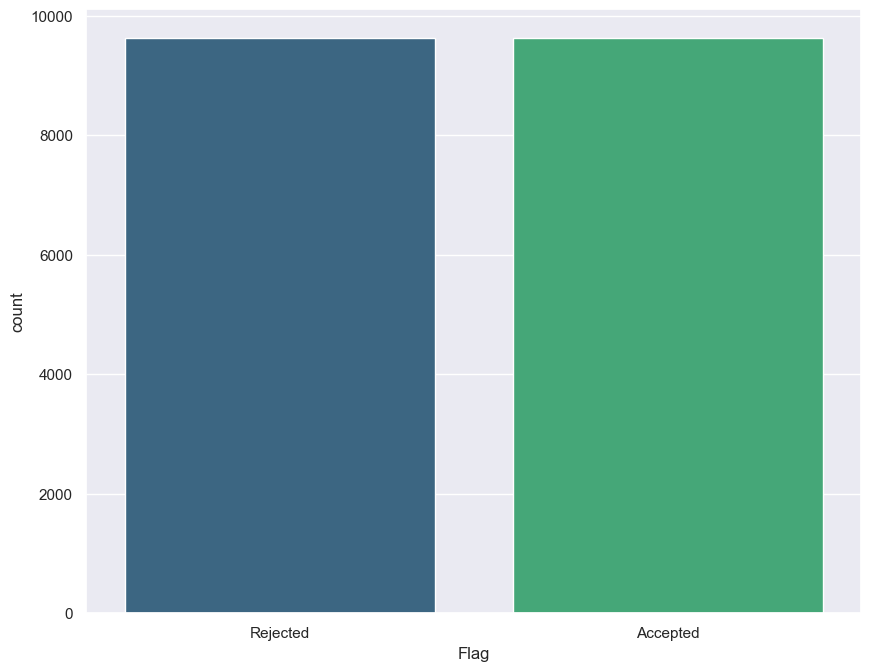

In [18]:
plt.figure(figsize=(10,8),dpi=100)
sns.countplot(data=df,x='Flag',palette='viridis')

In [19]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
STATUS                 float64
Flag                    object
dtype: object

In [20]:
df.isna().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        5771
CNT_FAM_MEMBERS           0
STATUS                 9626
Flag                      0
dtype: int64

In [21]:
df['OCCUPATION_TYPE']=np.where(df['OCCUPATION_TYPE'].isnull(), 'Unemployed',df['OCCUPATION_TYPE'] )

In [22]:
df['OCCUPATION_TYPE'].head()

0    Core staff
1    Unemployed
2    Unemployed
3      Managers
4    Unemployed
Name: OCCUPATION_TYPE, dtype: object

In [23]:
df.OCCUPATION_TYPE.unique()

array(['Core staff', 'Unemployed', 'Managers', 'Accountants',
       'Sales staff', 'Drivers', 'High skill tech staff',
       'Security staff', 'Laborers', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Medicine staff',
       'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents',
       'IT staff', 'Secretaries', 'HR staff'], dtype=object)

In [24]:
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      17188
With parents             883
Municipal apartment      667
Rented apartment         296
Office apartment         160
Co-op apartment           58
Name: NAME_HOUSING_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

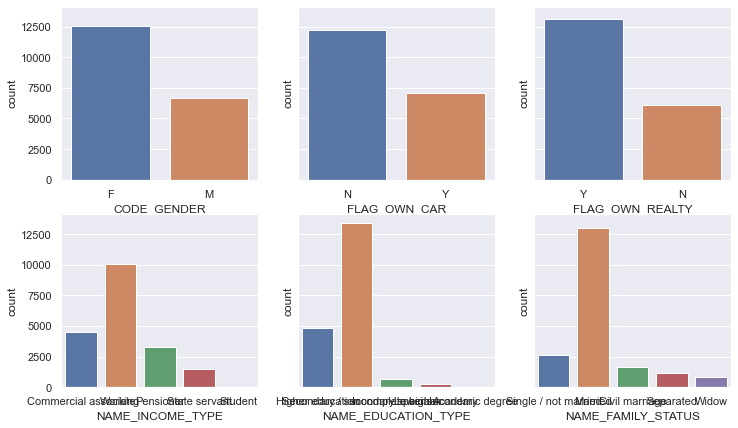

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("CODE_GENDER", data=df, ax=axes[0,0])
sns.countplot("FLAG_OWN_CAR", data=df, ax=axes[0,1])
sns.countplot("FLAG_OWN_REALTY", data=df, ax=axes[0,2])
sns.countplot("NAME_INCOME_TYPE", data=df, ax=axes[1,0])
sns.countplot("NAME_EDUCATION_TYPE", data=df, ax=axes[1,1])
sns.countplot("NAME_FAMILY_STATUS", data=df, ax=axes[1,2])


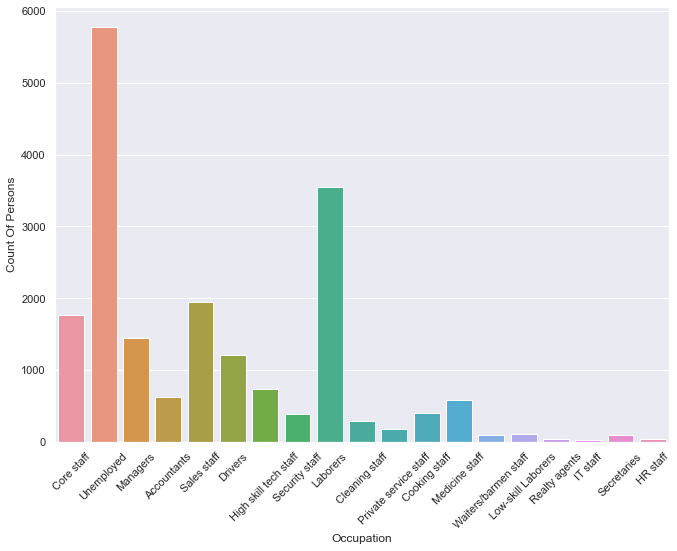

In [26]:
sns.countplot("OCCUPATION_TYPE", data=df)
plt.xlabel("Occupation")
plt.xticks(rotation=45)
plt.ylabel("Count Of Persons")
plt.show()

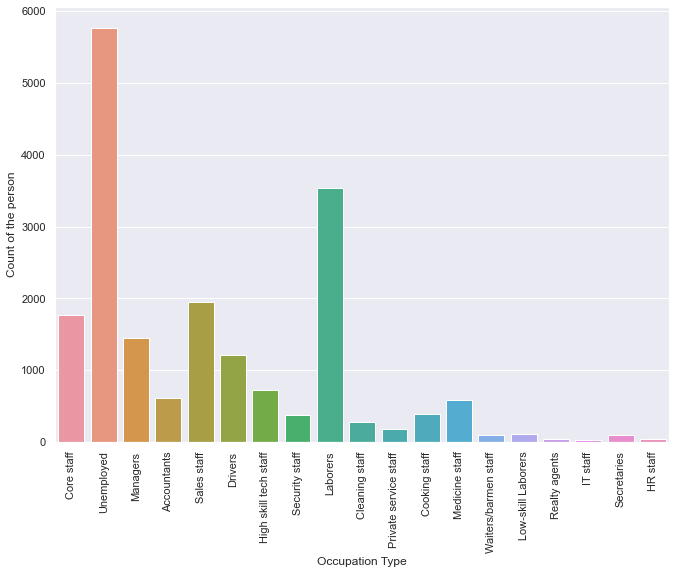

In [27]:
sns.countplot("OCCUPATION_TYPE", data=df)
plt.xlabel("Occupation Type")
plt.xticks(rotation=90)
plt.ylabel("Count of the person")
plt.show()

In [28]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Flag
0,5994722,F,N,Y,0,405000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13292,-3569,1,1,1,0,Core staff,1,NaN,Rejected
1,5542056,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9939,-1275,1,0,0,0,Unemployed,3,NaN,Rejected
2,5804787,F,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21069,365243,1,0,0,0,Unemployed,2,NaN,Rejected
3,6059876,F,Y,N,1,180000.0,Working,Higher education,Married,House / apartment,-16411,-6311,1,0,0,0,Managers,3,NaN,Rejected
4,5322444,F,N,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-20000,-5460,1,1,1,0,Unemployed,2,NaN,Rejected


In [29]:
def remove_outliers(x):

    ## storing names of columns in Column_Names
    Column_Names=x.columns

    ## importing matplotlib and seaborn for visualisation of outliers
    import matplotlib.pyplot as plt
    import seaborn as sns   

    ## iterating through Column_Names using try and except for distinguishing between numerical and categorical columns
    for j in Column_Names:
        try:
            print('Before Removing Outliers')

            ##visualisation of outliers
            a = sns.boxplot(data=x,x=x[j])
            plt.tight_layout() 
            plt.show() 

            xy=x[j]    
            mydata=pd.DataFrame()

            updated=[]
            Q1,Q3=np.percentile(xy,[25,75])
            IQR=Q3-Q1
            minimum=Q1-1.5*IQR
            maximum=Q3+1.5*IQR

            ## using the maximum and minimum values obtained from quartiles and inter-quartile range
            ## any outliers greater than maximum are updated to be equal to maximum
            ## any outliers lesser than minimum are updated to be equal to minimum
            ## here, no outliers have been removed to prevent loss of data

            for i in xy:
                if(i>maximum):
                    i=maximum
                    updated.append(i)
                elif(i<minimum):
                    i=minimum
                    updated.append(i)
                else:
                    updated.append(i)

            x[j]=updated
            print('After Removing Outliers')

            ## visualising after removing outliers
            b= sns.boxplot(data=x,x=x[j])
            plt.tight_layout() 
            plt.show()

        except:
            continue

    return x

In [30]:
df1=df.copy()
df1=df1.drop('Flag', axis=1)

In [31]:
import math
def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [32]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [33]:
columns=df.columns

In [34]:
columns=np.asarray(columns)

In [35]:
col='Flag'

In [36]:
def highest_info_gain(df,columns,col):
    information_gains = {}
  
  #Iterate through each column name in our list
    for i in columns:
        information_gain = calc_information_gain(df1, i, col)
    #Add the information gain to our dictionary using the column name as the ekey                                         
        information_gains[i] = information_gain
  
  #Return the key with the highest value                                          
        return max(information_gains, key=information_gains.get)

In [37]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5994722,F,N,Y,0,405000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13292,-3569,1,1,1,0,Core staff,1,NaN
1,5542056,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9939,-1275,1,0,0,0,Unemployed,3,NaN
2,5804787,F,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21069,365243,1,0,0,0,Unemployed,2,NaN
3,6059876,F,Y,N,1,180000.0,Working,Higher education,Married,House / apartment,-16411,-6311,1,0,0,0,Managers,3,NaN
4,5322444,F,N,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-20000,-5460,1,1,1,0,Unemployed,2,NaN


In [38]:
df1.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
count,1.925200e+04,19252.000000,1.925200e+04,19252.000000,19252.000000,19252.0,19252.000000,19252.000000,19252.000000,19252.000000,9626.000000
mean,5.538177e+06,0.425670,1.794974e+05,-15905.289476,59222.766881,1.0,0.212030,0.274101,0.094847,2.187357,0.160087
std,5.645254e+05,0.745831,1.006484e+05,4234.819451,137421.661180,0.0,0.408757,0.446072,0.293012,0.916355,0.526918
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-16495.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.069422e+06,0.000000,1.125000e+05,-19436.500000,-2956.250000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.150510e+06,0.000000,1.575000e+05,-15536.500000,-1367.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,6.007304e+06,1.000000,2.250000e+05,-12348.750000,-351.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,7.170484e+06,19.000000,3.950060e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,5.000000


In [39]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
count,1.925200e+04,19252.000000,1.925200e+04,19252.000000,19252.000000,19252.0,19252.000000,19252.000000,19252.000000,19252.000000,9626.000000
mean,5.538177e+06,0.425670,1.794974e+05,-15905.289476,59222.766881,1.0,0.212030,0.274101,0.094847,2.187357,0.160087
std,5.645254e+05,0.745831,1.006484e+05,4234.819451,137421.661180,0.0,0.408757,0.446072,0.293012,0.916355,0.526918
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-16495.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.069422e+06,0.000000,1.125000e+05,-19436.500000,-2956.250000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.150510e+06,0.000000,1.575000e+05,-15536.500000,-1367.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,6.007304e+06,1.000000,2.250000e+05,-12348.750000,-351.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,7.170484e+06,19.000000,3.950060e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,5.000000


In [40]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
value=df.values
print(value)
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
value
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

[[5994722 'F' 'N' ... 1 nan 'Rejected']
 [5542056 'F' 'Y' ... 3 nan 'Rejected']
 [5804787 'F' 'Y' ... 2 nan 'Rejected']
 ...
 [5149055 'F' 'N' ... 2 2.0 'Accepted']
 [5149838 'F' 'N' ... 2 5.0 'Accepted']
 [5150337 'M' 'N' ... 1 2.0 'Accepted']]
9 columns were label encoded.


In [41]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Flag
0,5994722,0,0,1,0,405000.0,0,1,3,1,-13292,-3569,1,1,1,0,3,1,NaN,1
1,5542056,0,1,1,1,157500.0,4,4,1,1,-9939,-1275,1,0,0,0,17,3,NaN,1
2,5804787,0,1,1,0,225000.0,1,4,0,1,-21069,365243,1,0,0,0,17,2,NaN,1
3,6059876,0,1,0,1,180000.0,4,1,1,1,-16411,-6311,1,0,0,0,10,3,NaN,1
4,5322444,0,0,0,0,202500.0,4,4,1,1,-20000,-5460,1,1,1,0,17,2,NaN,1


In [42]:
df.OCCUPATION_TYPE.value_counts()

17    5771
8     3543
14    1944
3     1768
10    1447
4     1213
6      728
0      618
11     581
2      397
16     381
1      285
12     180
9      112
18      93
15      92
5       36
13      35
7       28
Name: OCCUPATION_TYPE, dtype: int64

In [43]:
plt.figure(figsize=(15,8))

corrt=df.corr()

print(corrt)

                           ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
ID                   1.000000     0.000080     -0.009712         0.032777   
CODE_GENDER          0.000080     1.000000      0.350497        -0.046136   
FLAG_OWN_CAR        -0.009712     0.350497      1.000000         0.003030   
FLAG_OWN_REALTY      0.032777    -0.046136      0.003030         1.000000   
CNT_CHILDREN         0.008811     0.047337      0.089183         0.004905   
AMT_INCOME_TOTAL    -0.013734     0.190524      0.210926         0.032176   
NAME_INCOME_TYPE     0.025781     0.080515      0.039616        -0.046394   
NAME_EDUCATION_TYPE  0.001593     0.008005     -0.092677         0.005335   
NAME_FAMILY_STATUS   0.005667    -0.076377     -0.127706        -0.007194   
NAME_HOUSING_TYPE    0.004935     0.055854      0.003509        -0.188945   
DAYS_BIRTH           0.024289     0.164964      0.127760        -0.118681   
DAYS_EMPLOYED       -0.026845    -0.158622     -0.146354         0.072241   

<Figure size 1080x576 with 0 Axes>

In [44]:
corrt.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'STATUS', 'Flag'],
      dtype='object')

<AxesSubplot:>

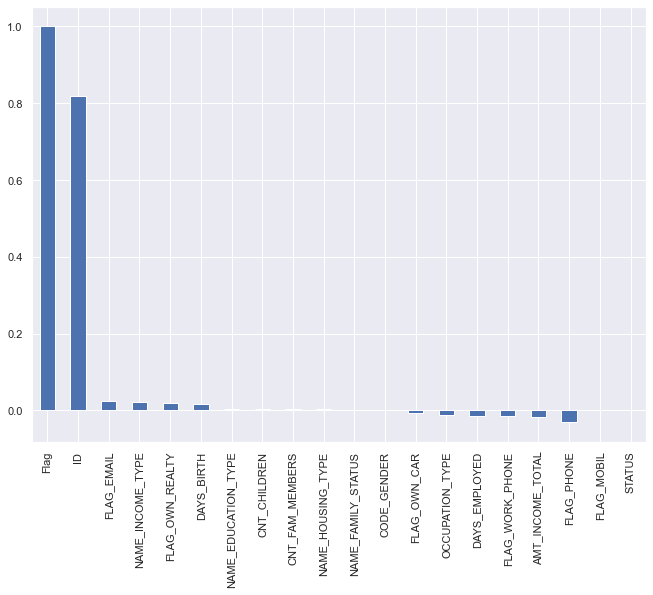

In [45]:
corrt['Flag'].sort_values(ascending = False).plot(kind='bar')

In [46]:
df_corr=df.corr()

In [47]:
df_corr.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Flag
ID,1.000000,0.000080,-0.009712,0.032777,0.008811,-0.013734,0.025781,0.001593,0.005667,0.004935,0.024289,-0.026845,NaN,-0.018002,-0.041958,0.035552,-0.018573,0.006306,0.014528,0.818637
CODE_GENDER,0.000080,1.000000,0.350497,-0.046136,0.047337,0.190524,0.080515,0.008005,-0.076377,0.055854,0.164964,-0.158622,NaN,0.041156,-0.021365,0.014852,-0.135547,0.077059,0.011043,0.000872
FLAG_OWN_CAR,-0.009712,0.350497,1.000000,0.003030,0.089183,0.210926,0.039616,-0.092677,-0.127706,0.003509,0.127760,-0.146354,NaN,0.015969,-0.003965,0.031056,-0.120837,0.139263,-0.002383,-0.005932
FLAG_OWN_REALTY,0.032777,-0.046136,0.003030,1.000000,0.004905,0.032176,-0.046394,0.005335,-0.007194,-0.188945,-0.118681,0.072241,NaN,-0.178045,-0.062608,0.056275,0.041138,0.013190,-0.017885,0.019852
CNT_CHILDREN,0.008811,0.047337,0.089183,0.004905,1.000000,0.016790,0.103050,-0.030079,-0.154308,0.014302,0.326495,-0.227437,NaN,0.049995,-0.028145,0.019188,-0.132201,0.888469,0.006407,0.004248


<AxesSubplot:>

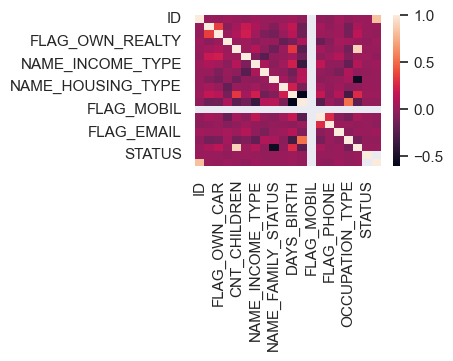

In [48]:
plt.figure(figsize=(3,2),dpi=100)
sns.heatmap(df_corr)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
df=df.sample(frac=1)

In [51]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Flag
4770,5807909,0,1,1,0,607500.0,0,4,3,1,-20747,-8238,1,0,0,0,10,1,NaN,1
7096,5956512,1,1,1,1,315000.0,4,4,1,2,-17009,-1889,1,1,1,0,10,3,NaN,1
292,5010518,1,1,1,1,450000.0,4,1,1,3,-18476,-2625,1,0,0,0,10,3,0.0,0
7769,5116815,1,0,1,0,85500.0,2,4,2,0,-16542,-8737,1,1,1,0,3,1,0.0,0
3373,5051208,0,1,0,0,160200.0,2,1,1,1,-14545,-6283,1,1,0,0,10,2,0.0,0


In [52]:
X= pd.get_dummies(df.drop(['ID','STATUS','Flag'],axis=1))
y= df['Flag']

In [53]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
4770,0,1,1,0,607500.0,0,4,3,1,-20747,-8238,1,0,0,0,10,1
7096,1,1,1,1,315000.0,4,4,1,2,-17009,-1889,1,1,1,0,10,3
292,1,1,1,1,450000.0,4,1,1,3,-18476,-2625,1,0,0,0,10,3
7769,1,0,1,0,85500.0,2,4,2,0,-16542,-8737,1,1,1,0,3,1
3373,0,1,0,0,160200.0,2,1,1,1,-14545,-6283,1,1,0,0,10,2


In [54]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
4770,0,1,1,0,607500.0,0,4,3,1,-20747,-8238,1,0,0,0,10,1
7096,1,1,1,1,315000.0,4,4,1,2,-17009,-1889,1,1,1,0,10,3
292,1,1,1,1,450000.0,4,1,1,3,-18476,-2625,1,0,0,0,10,3
7769,1,0,1,0,85500.0,2,4,2,0,-16542,-8737,1,1,1,0,3,1
3373,0,1,0,0,160200.0,2,1,1,1,-14545,-6283,1,1,0,0,10,2


In [55]:
y.head()

4770    1
7096    1
292     0
7769    0
3373    0
Name: Flag, dtype: int32

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [65]:
scaled_X_train[1]

array([-0.7341736 , -0.75586725,  0.68637864, -0.56412954, -0.21955946,
        0.91714158,  0.64433336, -1.41919247, -0.29778412, -1.12938168,
       -0.43071163,  0.        ,  1.9283743 ,  1.61714958, -0.3224647 ,
       -0.45955213, -0.20286528])

In [62]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(17, input_shape=(17,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(scaled_X_train, y_train, epochs=100)

Epoch 1/100
452/452 [==============================] - 0s 506us/step - loss: 0.6975 - accuracy: 0.4964
Epoch 2/100
452/452 [==============================] - 0s 540us/step - loss: 0.6936 - accuracy: 0.5047
Epoch 3/100
452/452 [==============================] - 0s 491us/step - loss: 0.6930 - accuracy: 0.5003
Epoch 4/100
452/452 [==============================] - 0s 498us/step - loss: 0.6924 - accuracy: 0.5054
Epoch 5/100
452/452 [==============================] - 0s 519us/step - loss: 0.6922 - accuracy: 0.5061
Epoch 6/100
452/452 [==============================] - 0s 496us/step - loss: 0.6918 - accuracy: 0.5124
Epoch 7/100
452/452 [==============================] - 0s 544us/step - loss: 0.6916 - accuracy: 0.5146
Epoch 8/100
452/452 [==============================] - 0s 547us/step - loss: 0.6905 - accuracy: 0.5198
Epoch 9/100
452/452 [==============================] - 0s 557us/step - loss: 0.6898 - accuracy: 0.5247
Epoch 10/100
452/452 [==============================] - 0s 517us/step - l

In [79]:
from sklearn.metrics import confusion_matrix , classification_report
def ANN(scaled_X_train, y_train, scaled_X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(17, input_dim=17, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(scaled_X_train, y_train, epochs=100)

    print(model.evaluate(scaled_X_test, y_test))

    y_preds = model.predict(scaled_X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [80]:
y_preds = ANN(scaled_X_train, y_train, scaled_X_test, y_test, 'binary_crossentropy')

Epoch 1/100
452/452 [==============================] - 0s 580us/step - loss: 0.6939 - accuracy: 0.5029
Epoch 2/100
452/452 [==============================] - 0s 549us/step - loss: 0.6929 - accuracy: 0.5100
Epoch 3/100
452/452 [==============================] - 0s 567us/step - loss: 0.6919 - accuracy: 0.5187
Epoch 4/100
452/452 [==============================] - 0s 572us/step - loss: 0.6913 - accuracy: 0.5238
Epoch 5/100
452/452 [==============================] - 0s 588us/step - loss: 0.6902 - accuracy: 0.5275
Epoch 6/100
452/452 [==============================] - 0s 579us/step - loss: 0.6893 - accuracy: 0.5342
Epoch 7/100
452/452 [==============================] - 0s 576us/step - loss: 0.6882 - accuracy: 0.5408
Epoch 8/100
452/452 [==============================] - 0s 555us/step - loss: 0.6874 - accuracy: 0.5435
Epoch 9/100
452/452 [==============================] - 0s 558us/step - loss: 0.6866 - accuracy: 0.5405
Epoch 10/100
452/452 [==============================] - 0s 560us/step - l

In [82]:
scaled_X_train.shape

(14439, 17)

In [86]:
from sklearn.ensemble import RandomForestClassifier
for_reg = RandomForestClassifier(random_state = 65)
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,mean_squared_error

In [87]:
error_rates= []
for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    
    predict= model.predict(X_test)
    
    error= 1- accuracy_score(y_test,predict)
    
    error_rates.append(error)

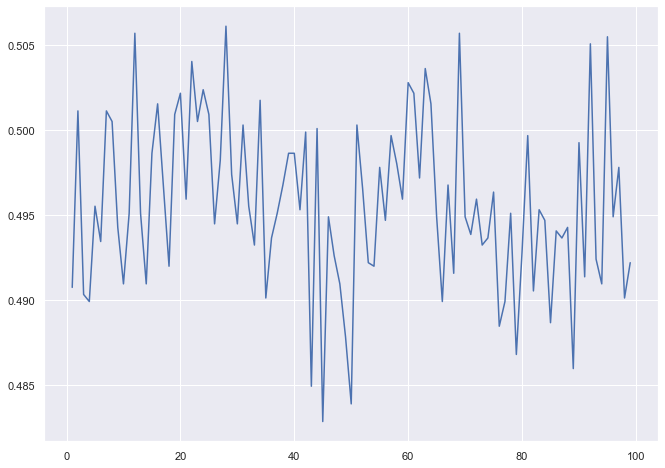

In [88]:
plt.plot(range(1,100),error_rates)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [69]:
param_grid= {'n_neighbors':range(1,50), 'metric': ['minkowski','manhattan','euclidean']}
knn_grid_model = GridSearchCV(knn_model,param_grid)
knn_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)})

In [70]:
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)})

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)})

In [71]:
knn_predictions = knn_grid_model.predict(scaled_X_test)

In [72]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [73]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54      2328
           1       0.51      0.38      0.44      2485

    accuracy                           0.49      4813
   macro avg       0.50      0.50      0.49      4813
weighted avg       0.50      0.49      0.49      4813

